Bike Sharing Demand 데이터셋을 활용한 ML(Regression) 연습
=======================================================

### Kaggle Site
### https://www.kaggle.com/c/bike-sharing-demand

![자전거대여이미지](./BikeSharing_images/1.png)

In [64]:
import pandas as pd

1. Data Load
=============

In [65]:
train = pd.read_csv('./input_bikesharing/train.csv',  parse_dates=['datetime'])
print(train.shape)
print(train.columns)
print(train.info())
train.head()

(10886, 12)
Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered',
       u'count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [66]:
test = pd.read_csv('./input_bikesharing/test.csv',  parse_dates=['datetime'])
print(test.shape)
print(test.columns)
print(test.info())
test.head()

(6493, 9)
Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [67]:
print(train['season'].unique(), test['season'].unique())
print(train['holiday'].unique(), test['holiday'].unique())
print(train['workingday'].unique(), test['workingday'].unique())
print(train['weather'].unique(), test['weather'].unique())

(array([1, 2, 3, 4]), array([1, 2, 3, 4]))
(array([0, 1]), array([0, 1]))
(array([0, 1]), array([1, 0]))
(array([1, 2, 3, 4]), array([1, 2, 3, 4]))


In [68]:
train['windspeed'].unique()

array([  0.    ,   6.0032,  16.9979,  19.0012,  19.9995,  12.998 ,
        15.0013,   8.9981,  11.0014,  22.0028,  30.0026,  23.9994,
        27.9993,  26.0027,   7.0015,  32.9975,  36.9974,  31.0009,
        35.0008,  39.0007,  43.9989,  40.9973,  51.9987,  46.0022,
        50.0021,  43.0006,  56.9969,  47.9988])

2. datatime 컬럼으로 값을 parset 해서 년/월/일/시/분/초/요일 컬럼을 새로 생성하기
===================================================================

In [69]:
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [70]:
test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour
test['datetime-minute'] = test['datetime'].dt.minute
test['datetime-second'] = test['datetime'].dt.second
test['datetime-dayofweek'] = test['datetime'].dt.dayofweek
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


In [71]:
print(train['datetime-day'].unique())
test['datetime-day'].unique()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

### One hot Encoding

In [72]:
train['dayofweek-mon'] = train['datetime-dayofweek'] == 0
train['dayofweek-tue'] = train['datetime-dayofweek'] == 1
train['dayofweek-web'] = train['datetime-dayofweek'] == 2
train['dayofweek-thu'] = train['datetime-dayofweek'] == 3
train['dayofweek-fri'] = train['datetime-dayofweek'] == 4
train['dayofweek-sat'] = train['datetime-dayofweek'] == 5
train['dayofweek-sun'] = train['datetime-dayofweek'] == 6

In [73]:
test['dayofweek-mon'] = test['datetime-dayofweek'] == 0
test['dayofweek-tue'] = test['datetime-dayofweek'] == 1
test['dayofweek-web'] = test['datetime-dayofweek'] == 2
test['dayofweek-thu'] = test['datetime-dayofweek'] == 3
test['dayofweek-fri'] = test['datetime-dayofweek'] == 4
test['dayofweek-sat'] = test['datetime-dayofweek'] == 5
test['dayofweek-sun'] = test['datetime-dayofweek'] == 6

2. Data 시각화
=============

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

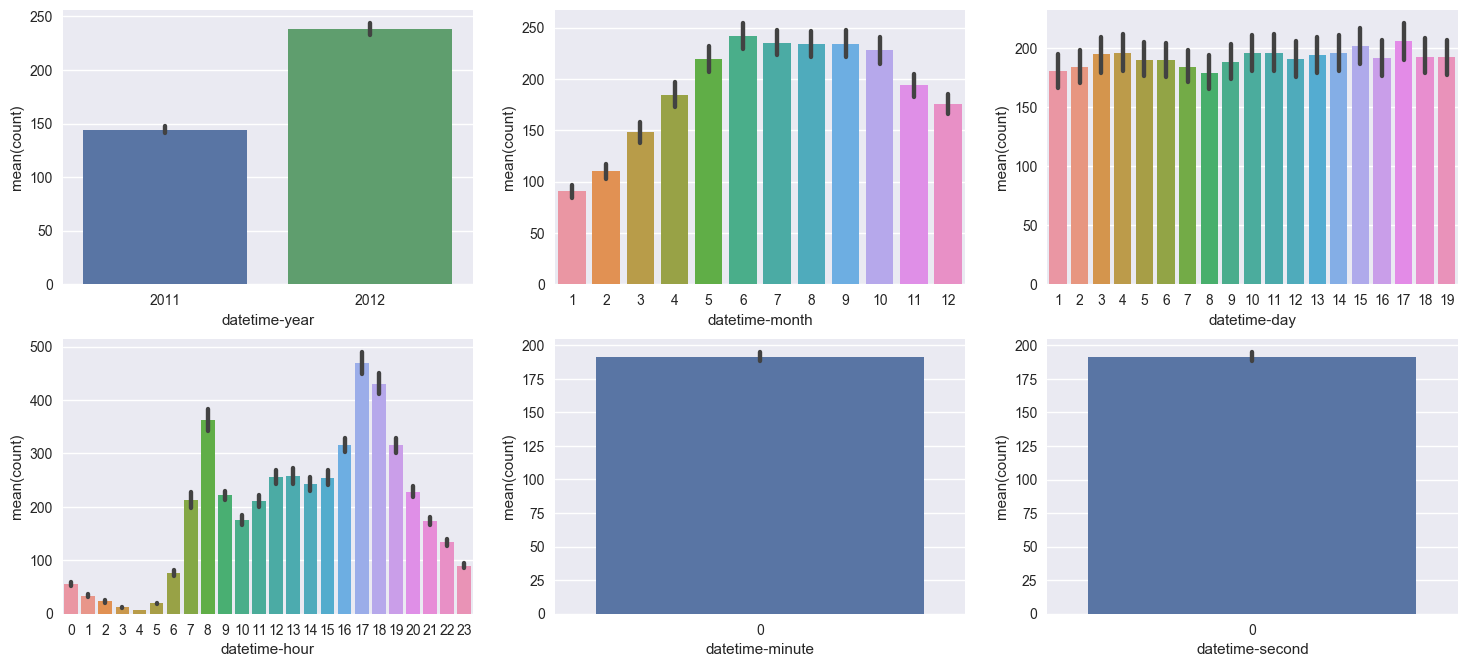

In [75]:
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)
sns.barplot(data=train, x='datetime-day', y='count', ax=ax3)
sns.barplot(data=train, x='datetime-hour', y='count', ax=ax4)
sns.barplot(data=train, x='datetime-minute', y='count', ax=ax5)
sns.barplot(data=train, x='datetime-second', y='count', ax=ax6)

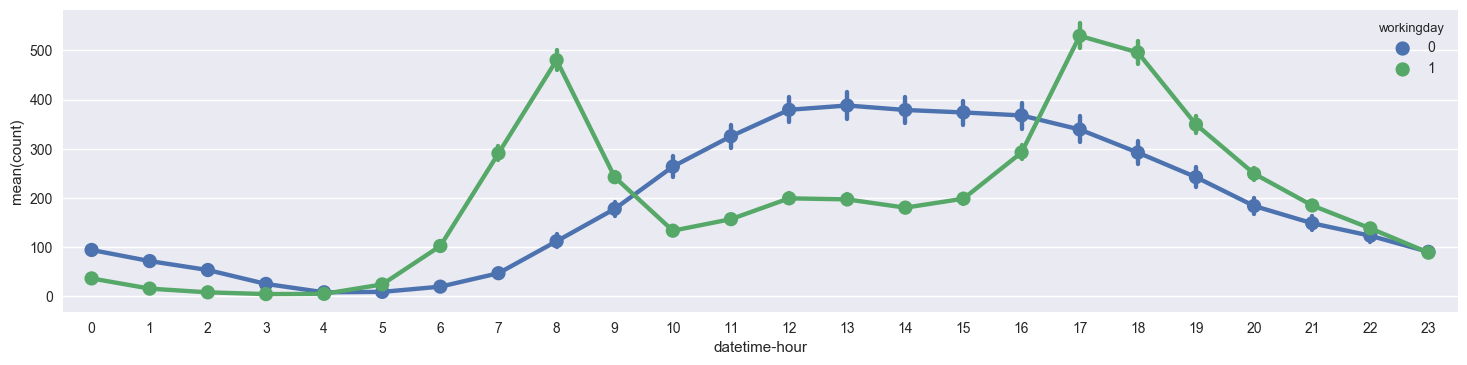

In [76]:
# 0 holiday 1 workingday
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)

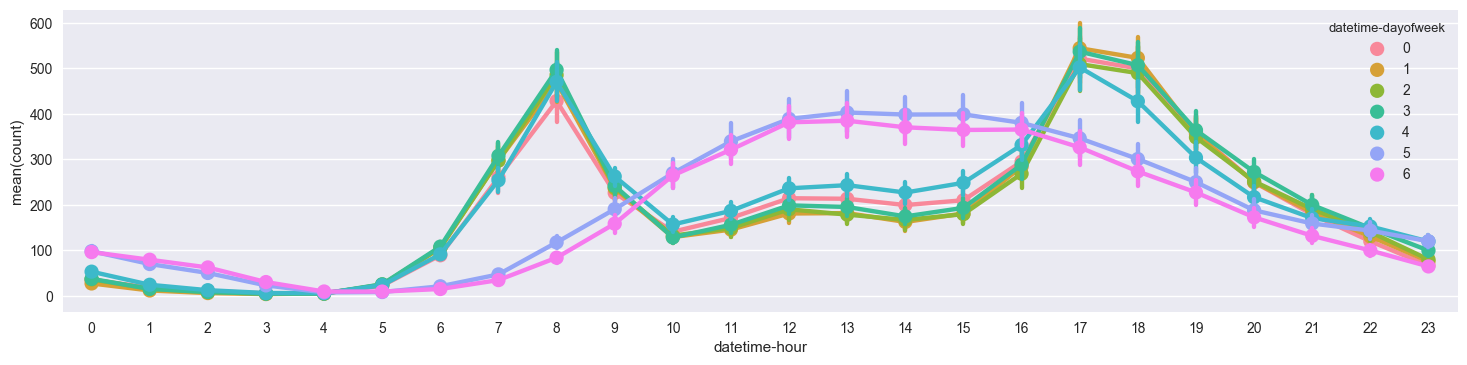

In [77]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax1)

3. Train
========

In [78]:
train.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered', u'count',
       u'datetime-year', u'datetime-month', u'datetime-day', u'datetime-hour',
       u'datetime-minute', u'datetime-second', u'datetime-dayofweek',
       u'dayofweek-mon', u'dayofweek-tue', u'dayofweek-web', u'dayofweek-thu',
       u'dayofweek-fri', u'dayofweek-sat', u'dayofweek-sun'],
      dtype='object')

In [79]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
                 'datetime-year','datetime-hour', 'dayofweek-mon', 'dayofweek-tue',
                'dayofweek-web', 'dayofweek-thu', 'dayofweek-fri', 'dayofweek-sat', 'dayofweek-sun']
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'dayofweek-mon',
 'dayofweek-tue',
 'dayofweek-web',
 'dayofweek-thu',
 'dayofweek-fri',
 'dayofweek-sat',
 'dayofweek-sun']

In [80]:
# fit
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 17)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,dayofweek-mon,dayofweek-tue,dayofweek-web,dayofweek-thu,dayofweek-fri,dayofweek-sat,dayofweek-sun
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,False,False,False,False,False,True,False
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,False,False,False,False,False,True,False
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,False,False,False,False,False,True,False
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,False,False,False,False,False,True,False
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,False,False,False,False,False,True,False


In [81]:
# fit
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 17)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,dayofweek-mon,dayofweek-tue,dayofweek-web,dayofweek-thu,dayofweek-fri,dayofweek-sat,dayofweek-sun
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,False,False,False,True,False,False,False
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,False,False,False,True,False,False,False
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,False,False,False,True,False,False,False
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,False,False,False,True,False,False,False
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,False,False,False,True,False,False,False


In [82]:
# 훈련 데이터의 답을 생성
label_name = 'count'
Y_train = train[label_name]
print(Y_train.shape)
Y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

3.1 RandomForest 알고리즘 선택
===========================

In [83]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=30, n_estimators=20)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=30, verbose=0, warm_start=False)

### 3.1.1 cross_val_score() 함수를 사용해서 score 계산

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
score = cross_val_score(model, X_train, Y_train)

In [86]:
score

array([ 0.67385651,  0.73613505,  0.84940774])

In [87]:
score.mean()

0.75313309814876328

In [88]:
score = cross_val_score(model, X_train, Y_train, cv=20)

In [89]:
score.mean()

0.86531479869110728

In [90]:
score = cross_val_score(model, X_train, Y_train, cv=20, scoring='neg_mean_absolute_error')
score

array([-15.62326343, -19.83497248, -37.07627457, -38.49885321,
       -28.65446396, -24.69969419, -31.39347426, -28.34950214,
       -28.53961397, -34.28792892, -33.23371324, -32.38897059,
       -44.8625    , -44.19650735, -34.54771752, -42.46636029,
       -42.22941176, -43.90635723, -36.57647059, -30.97889706])

In [91]:
score.mean()

-33.617247339116268

In [92]:
score = cross_val_score(model, X_train, Y_train, cv=20, scoring='neg_mean_absolute_error')
score.mean()
score_mean = -1.0 * score.mean()
score_mean
print('Score = {0: .5f}'.format(score_mean))

Score =  33.61725


3.2 fit
========

In [93]:
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=30, verbose=0, warm_start=False)

In [94]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions

(6493,)


array([  11.5       ,    3.8       ,    2.5       , ...,  102.05      ,
        106.94166667,   51.4       ])

4. Submit
=========

In [95]:
submit = pd.read_csv('./input_bikesharing/sampleSubmission.csv')
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [96]:
submit['count'] = predictions

In [97]:
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.5
1,2011-01-20 01:00:00,3.8
2,2011-01-20 02:00:00,2.5
3,2011-01-20 03:00:00,3.1
4,2011-01-20 04:00:00,3.0


In [98]:
submit.to_csv('./input_bikesharing/bike_sharing_04.csv', index=False)